In [1]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
colors = {"DCT": "#800515",
               "IC/DCT": "#bd5713",
               "Endothelium": "#63ad2d", 
               "PC": "#a4b507",
               "Immune": "black",
               "Podo": "black", 
               "Fibro": "#11db02",
               "VSMC/Mes": "#3d03fc",
               "PT": "#448efc",
               "PT?": "#51657a", 
               "iPT": "#dd04e0",
               "iPT/PEC": "#dd04e0",
               "PEC": "#ff0011",
               "TAL": "#b44dbf",
               "Injured TAL": "#ff0011",
         }

In [3]:
adata = sc.read_h5ad("/home/levinsj/spatial/adata/7_13_23_slide0_annotated.h5ad")

In [4]:
sq.gr.spatial_neighbors(
    adata,
    radius=0.02,
    coord_type="generic",
)

(array([3.1150e+03, 1.2091e+04, 2.8474e+04, 4.5960e+04, 5.8063e+04,
        6.2791e+04, 6.1784e+04, 5.7964e+04, 5.2403e+04, 4.5572e+04,
        3.7688e+04, 2.9723e+04, 2.2083e+04, 1.5453e+04, 1.0401e+04,
        6.2800e+03, 3.7700e+03, 2.2890e+03, 1.2490e+03, 6.9200e+02,
        3.5800e+02, 1.9600e+02, 8.6000e+01, 5.8000e+01, 2.2000e+01,
        1.0000e+01, 1.1000e+01, 7.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 49 artists>)

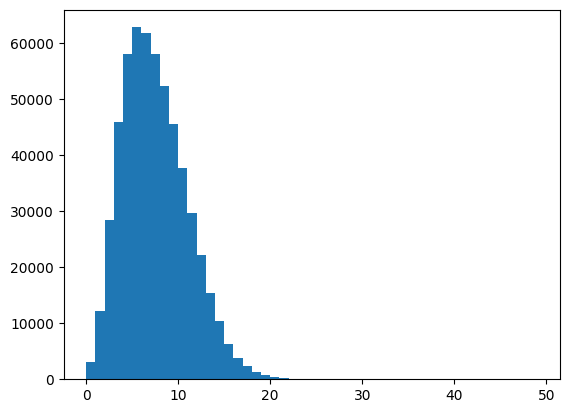

In [5]:
neighbor_check = []
for i in range(adata.obsp["spatial_connectivities"].shape[0]):
  neighbor_check.append(np.sum(adata.obsp["spatial_connectivities"][i]))

# total number of neighbors
plt.hist(neighbor_check, bins = np.arange(0, 50, 1))

In [6]:
fibroCells = (np.where(adata.obs['cellType_CosMx_1']=="Fibro")[0])
neighbors_fibro = np.where(adata.obsp["spatial_connectivities"][:, fibroCells].sum(axis=1) > 0)[0]
adata.obs["fibro_neighbors"] = 0

for i in neighbors_fibro:
    adata.obs["fibro_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, fibroCells])


/tmp/ipykernel_47013/1000151727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["fibro_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, fibroCells])


In [7]:
immuneCells = (np.where(adata.obs['cellType_CosMx_1']=="Immune")[0])
neighbors_immune = np.where(adata.obsp["spatial_connectivities"][:, immuneCells].sum(axis=1) > 0)[0]
adata.obs["immune_neighbors"] = 0

for i in neighbors_immune:
    adata.obs["immune_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, immuneCells])


/tmp/ipykernel_47013/605750179.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["immune_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, immuneCells])


/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


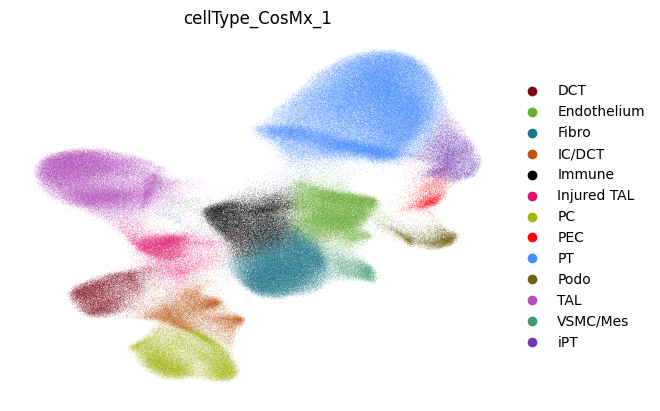

In [8]:
sc.pl.umap(adata, color = "cellType_CosMx_1", frameon = False)


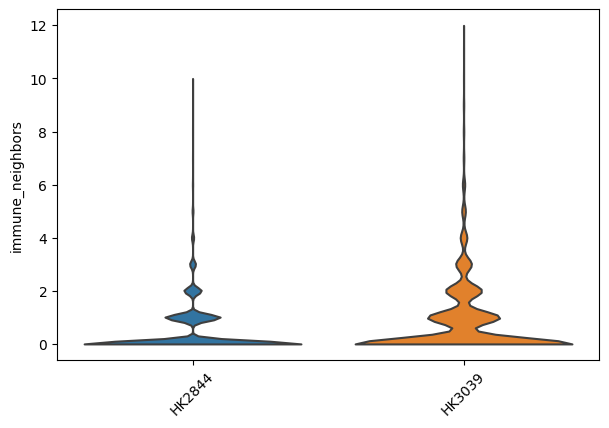

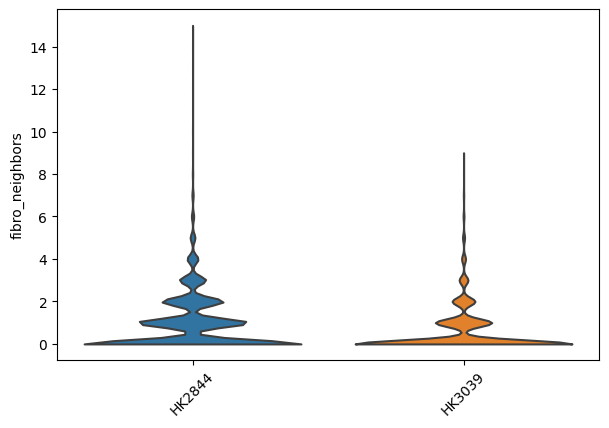

In [9]:
adata_iPT = adata[adata.obs["cellType_CosMx_1"] == "iPT"]

sc.pl.violin(adata_iPT, ['immune_neighbors'], size = 0, groupby = 'sample', rotation= 45, title = "Immune Neighbors, 20 microns, HK2844")
sc.pl.violin(adata_iPT, ['fibro_neighbors'], size = 0, groupby = 'sample', rotation= 45, title = "Fibro Neighbors, 20 microns, HK2844")


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


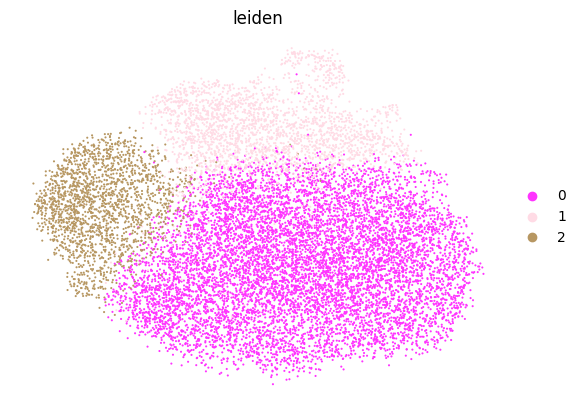

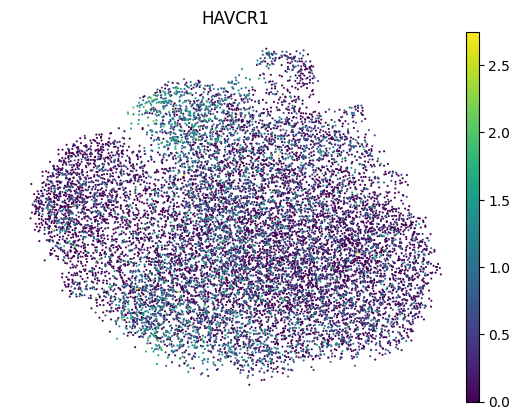

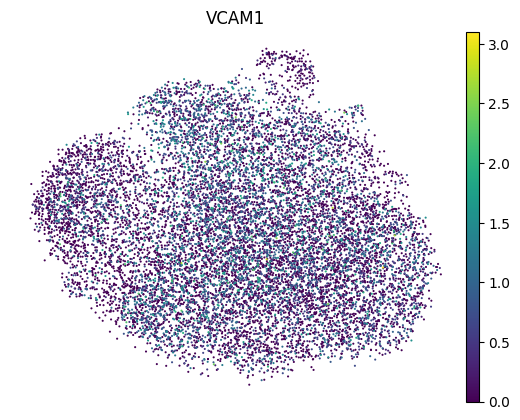

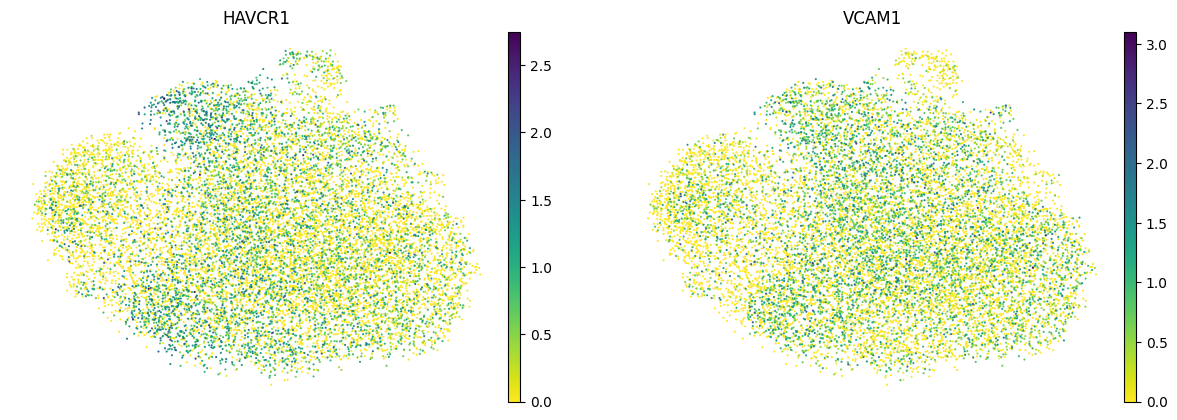

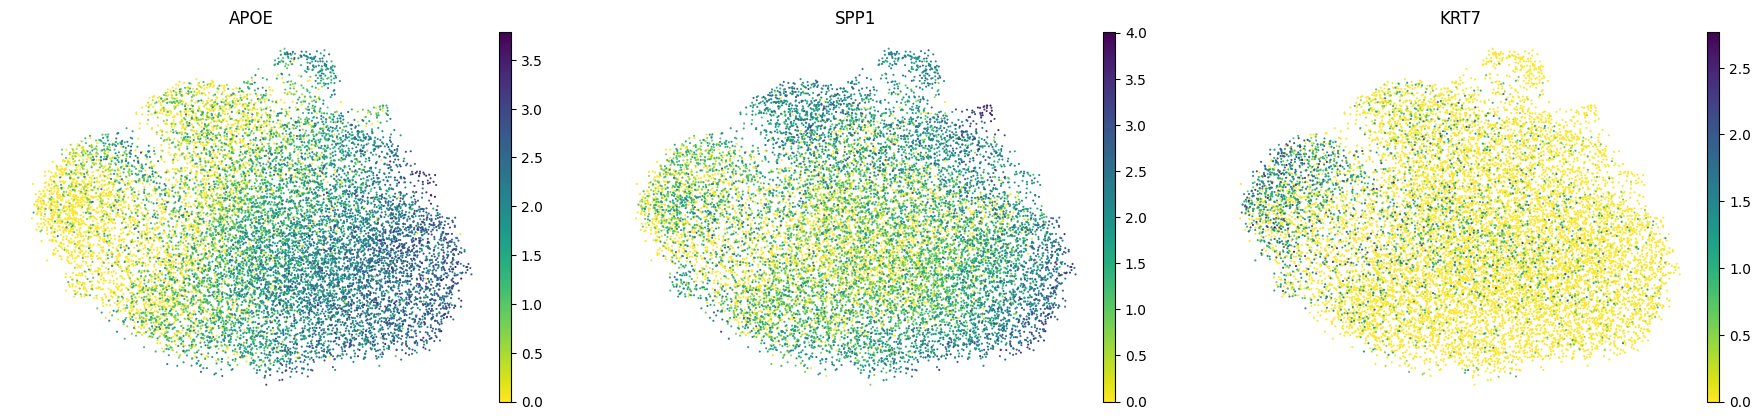

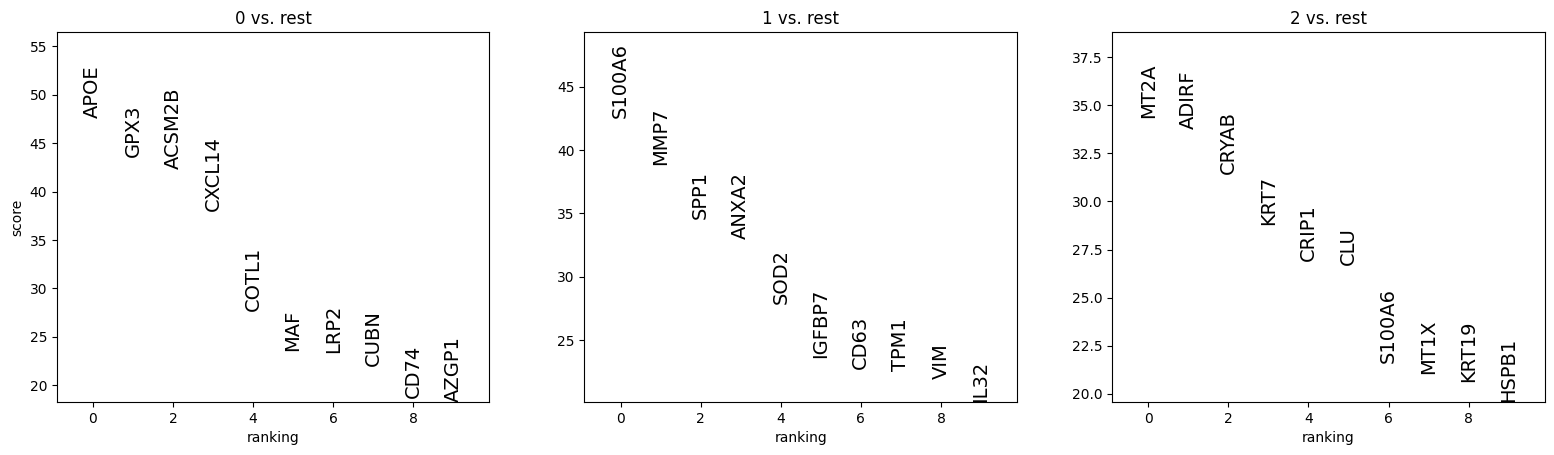

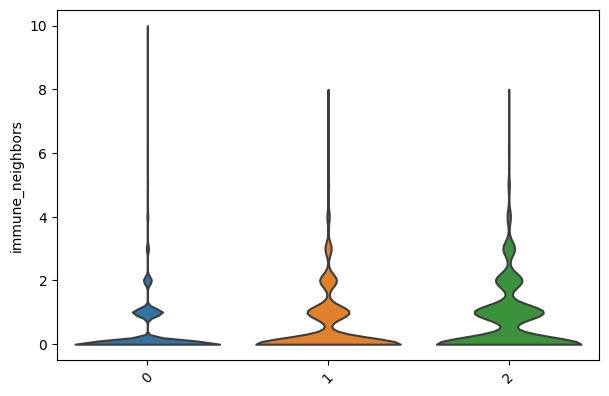

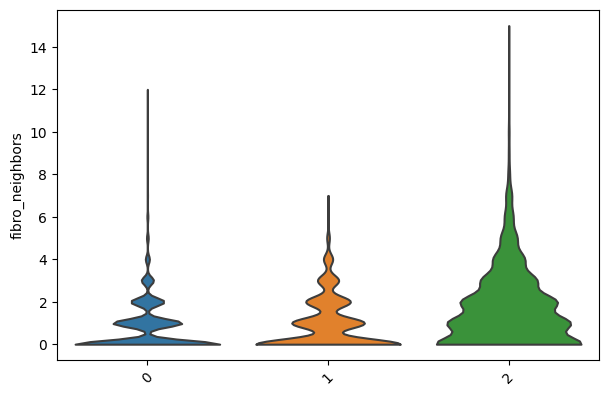

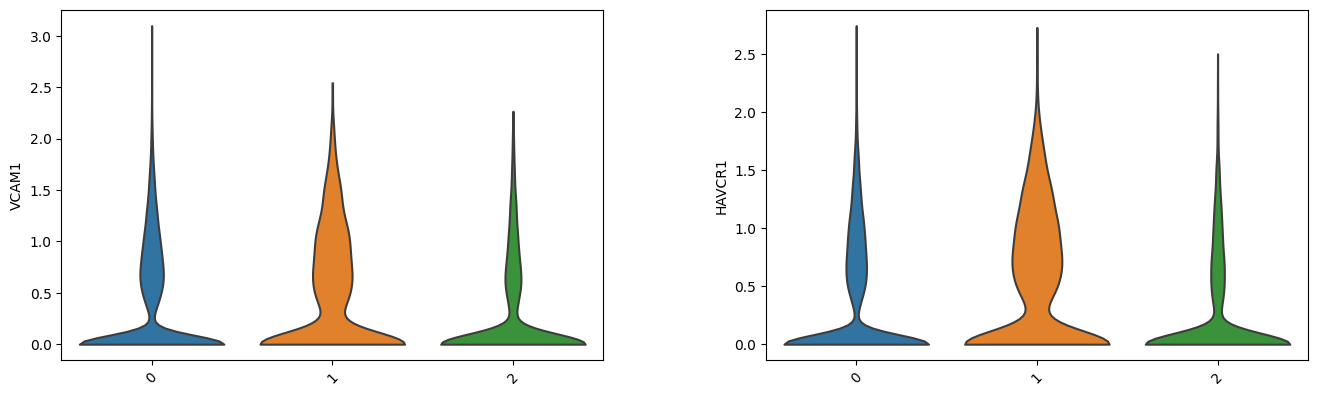

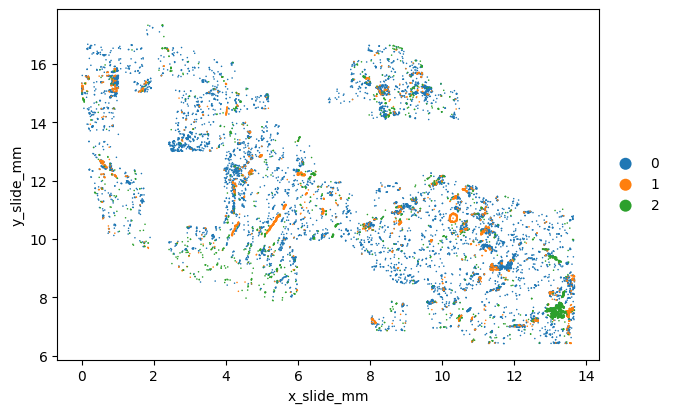

In [10]:

adata_sample = adata[adata.obs["sample"] == "HK2844"]
adata_iPT = adata_sample[adata_sample.obs["cellType_CosMx_1"] == "iPT"]

adata_iPT.X = adata_iPT.layers["counts"]
sc.pp.normalize_total(adata_iPT, inplace=True)
sc.pp.log1p(adata_iPT)
sc.pp.pca(adata_iPT)
sc.pp.neighbors(adata_iPT, n_neighbors = 15)
sc.tl.umap(adata_iPT)
sc.tl.leiden(adata_iPT, resolution = 0.3)
sc.pl.umap(adata_iPT, color = "leiden", frameon = False)
sc.pl.umap(adata_iPT, color = "HAVCR1", frameon = False)
sc.pl.umap(adata_iPT, color = "VCAM1", frameon = False)

sc.pl.umap(adata_iPT, color = ['HAVCR1', 'VCAM1'], frameon = False, cmap = "viridis_r")
sc.pl.umap(adata_iPT, color = ['APOE', 'SPP1',"KRT7"], frameon = False, cmap = "viridis_r")

sc.tl.rank_genes_groups(adata_iPT, groupby='leiden', method='wilcoxon', pts = True)
sc.pl.rank_genes_groups(adata_iPT, n_genes=10, sharey=False, fontsize = 14)

sc.pl.violin(adata_iPT, ['immune_neighbors'], size = 0, groupby = 'leiden', rotation= 45, title = "Immune Neighbors, 20 microns, HK2844")
sc.pl.violin(adata_iPT, ['fibro_neighbors'], size = 0, groupby = 'leiden', rotation= 45, title = "Fibro Neighbors, 20 microns, HK2844")

sc.pl.violin(adata_iPT, ['VCAM1', 'HAVCR1'], size = 0, groupby = 'leiden', rotation= 45, title = "iPT markers, 20 microns, HK2844")

sc.pl.scatter(
    adata_iPT,
    x="x_slide_mm",
    y="y_slide_mm",
    color="leiden",
    size=5,
    title = "", 
    
)

iPT = adata_iPT.obs["leiden"]

In [11]:
from scipy.stats import ranksums

ranksums(adata_iPT[adata_iPT.obs["leiden"] == "0"].obs["fibro_neighbors"], adata_iPT[adata_iPT.obs["leiden"] == "1"].obs["fibro_neighbors"])

RanksumsResult(statistic=-5.733427464681416, pvalue=9.842116739835982e-09)

In [12]:
ranksums(adata_iPT[adata_iPT.obs["leiden"] == "0"].obs["fibro_neighbors"], adata_iPT[adata_iPT.obs["leiden"] == "2"].obs["fibro_neighbors"])

RanksumsResult(statistic=-22.27725988437608, pvalue=6.14011530472758e-110)

In [13]:
ranksums(adata_iPT[adata_iPT.obs["leiden"] == "1"].obs["fibro_neighbors"], adata_iPT[adata_iPT.obs["leiden"] == "2"].obs["fibro_neighbors"])

RanksumsResult(statistic=-14.203254258664598, pvalue=8.745497216737656e-46)

In [14]:
# test fibro neighbors between leiden clusters
ranksums(adata_iPT[adata_iPT.obs["leiden"] == "0"].obs["immune_neighbors"], adata_iPT[adata_iPT.obs["leiden"] == "1"].obs["immune_neighbors"])

RanksumsResult(statistic=-8.162995465546944, pvalue=3.2681677796816384e-16)

In [15]:
ranksums(adata_iPT[adata_iPT.obs["leiden"] == "0"].obs["immune_neighbors"], adata_iPT[adata_iPT.obs["leiden"] == "2"].obs["immune_neighbors"])

RanksumsResult(statistic=-15.47619029653453, pvalue=5.0235429343672186e-54)

In [16]:
ranksums(adata_iPT[adata_iPT.obs["leiden"] == "1"].obs["immune_neighbors"], adata_iPT[adata_iPT.obs["leiden"] == "2"].obs["immune_neighbors"])

RanksumsResult(statistic=-6.486567476054302, pvalue=8.781396146462474e-11)

/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


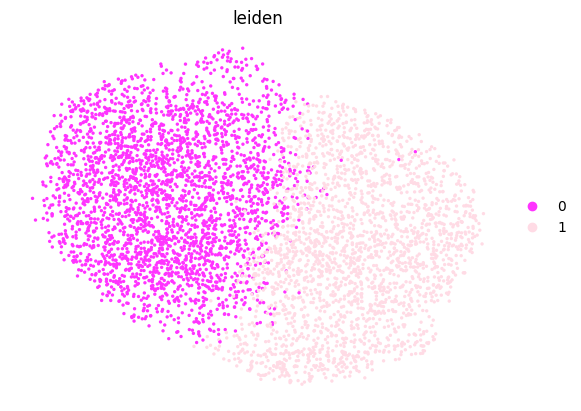

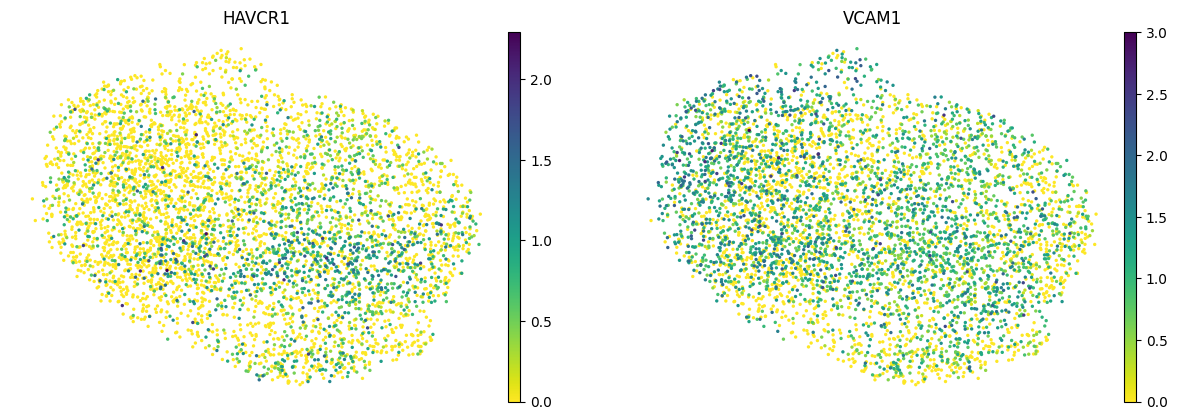

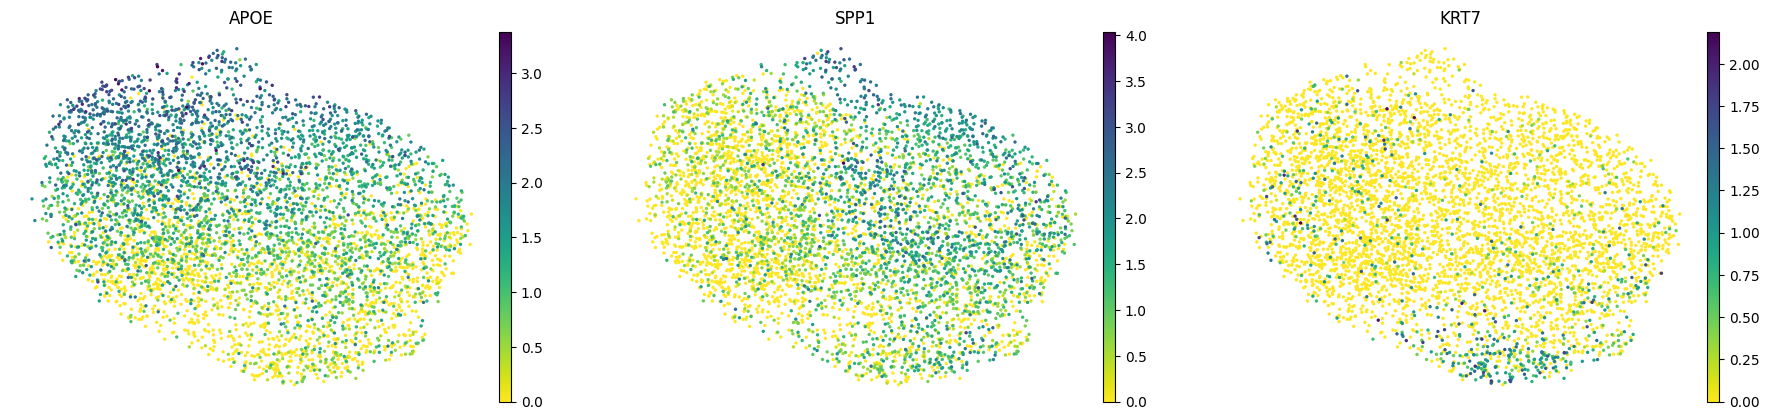

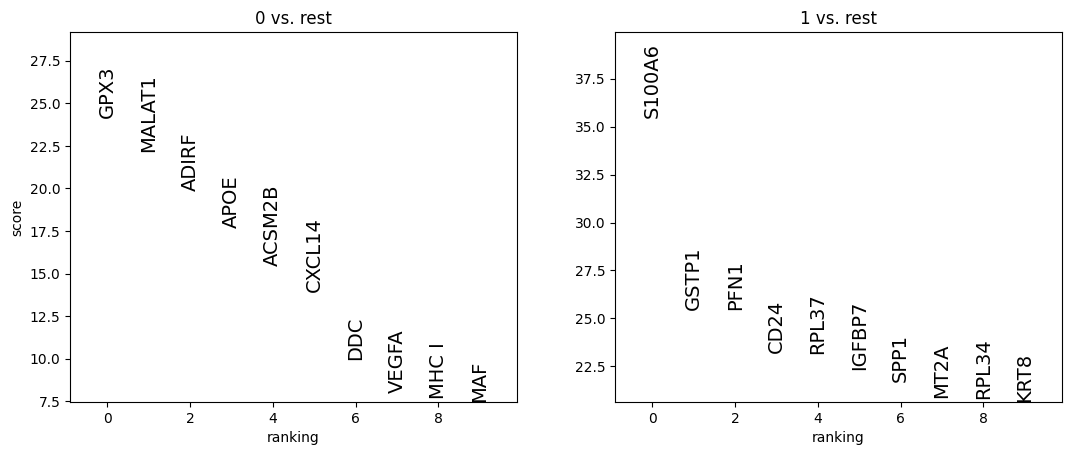

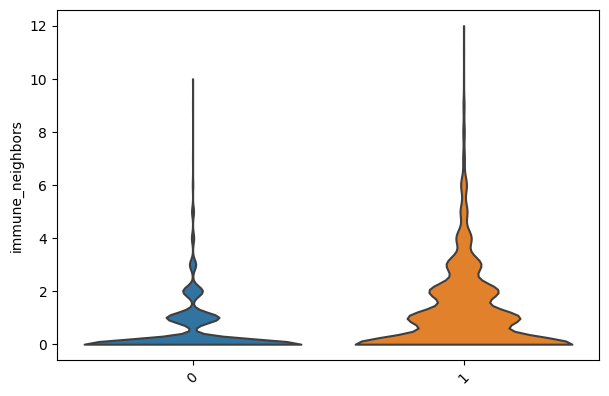

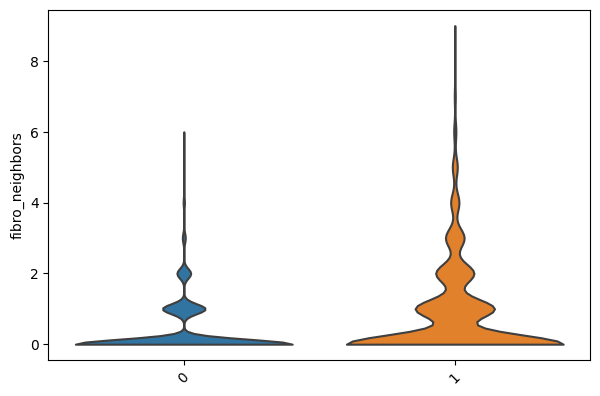

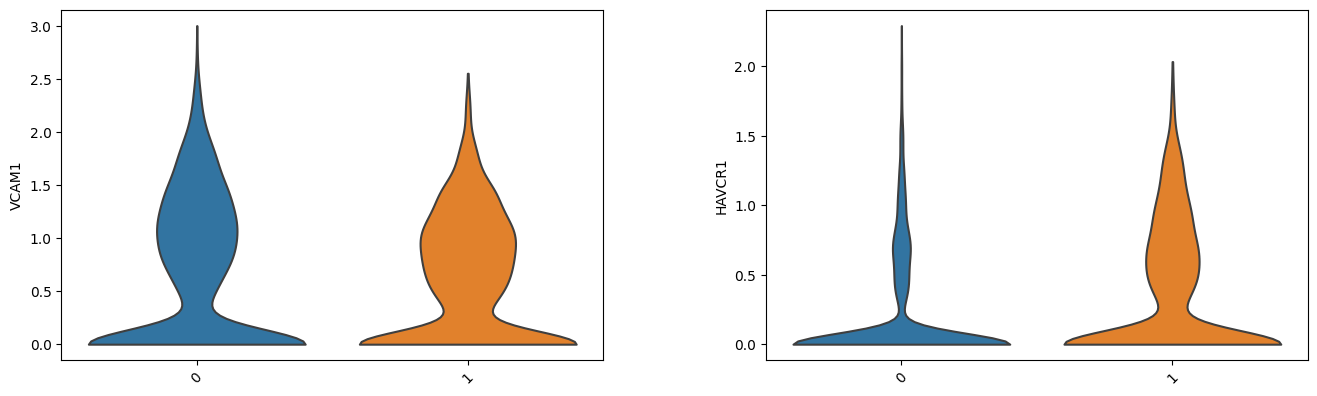

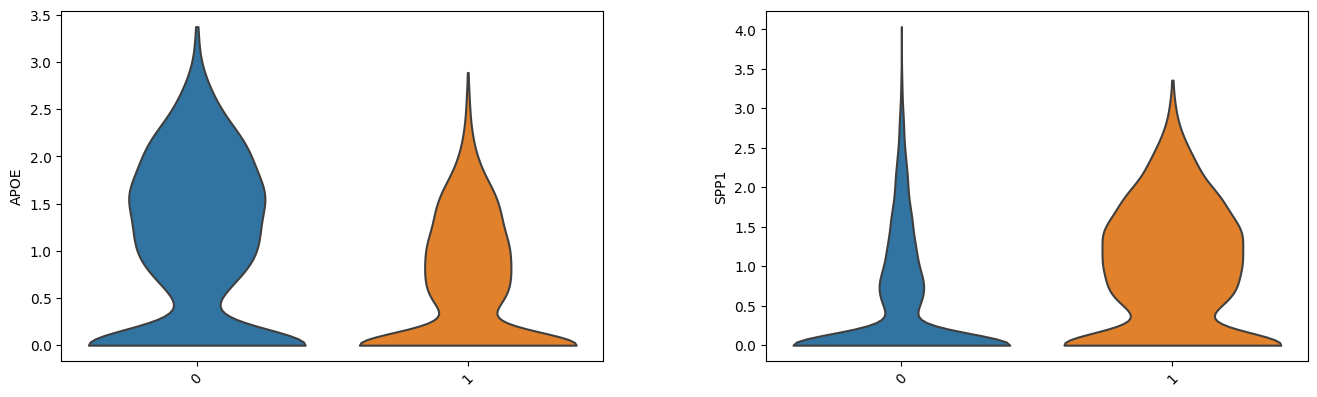

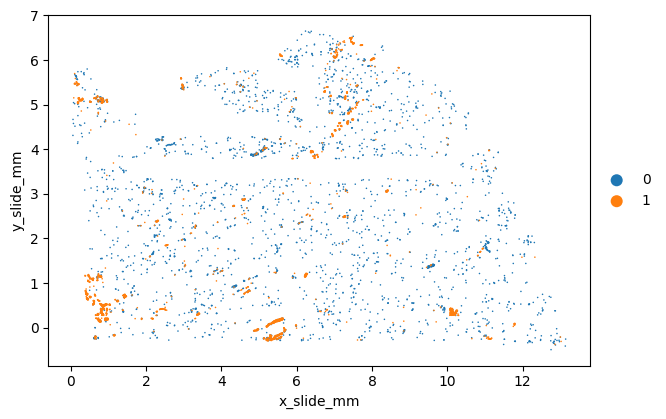

In [17]:
adata_sample = adata[adata.obs["sample"] == "HK3039"]
adata_iPT = adata_sample[adata_sample.obs["cellType_CosMx_1"] == "iPT"]

adata_iPT.X = adata_iPT.layers["counts"]
sc.pp.normalize_total(adata_iPT, inplace=True)
sc.pp.log1p(adata_iPT)
sc.pp.pca(adata_iPT)
sc.pp.neighbors(adata_iPT, n_neighbors = 15)
sc.tl.umap(adata_iPT)
sc.tl.leiden(adata_iPT, resolution = 0.3)
sc.pl.umap(adata_iPT, color = "leiden", frameon = False)

sc.pl.umap(adata_iPT, color = ['HAVCR1', 'VCAM1'], frameon = False, cmap = "viridis_r")
sc.pl.umap(adata_iPT, color = ['APOE', 'SPP1',"KRT7"], frameon = False, cmap = "viridis_r")


sc.tl.rank_genes_groups(adata_iPT, groupby='leiden', method='wilcoxon', pts = True)
sc.pl.rank_genes_groups(adata_iPT, n_genes=10, sharey=False, fontsize = 14)

sc.pl.violin(adata_iPT, ['immune_neighbors'], size = 0, groupby = 'leiden', rotation= 45, title = "Immune Neighbors, 20 microns, HK3039")
sc.pl.violin(adata_iPT, ['fibro_neighbors'], size = 0, groupby = 'leiden', rotation= 45, title = "Fibro Neighbors, 20 microns, HK3039")

sc.pl.violin(adata_iPT, ['VCAM1', 'HAVCR1'], size = 0, groupby = 'leiden', rotation= 45, title = "iPT markers, HK2844")
sc.pl.violin(adata_iPT, ['APOE', 'SPP1'], size = 0, groupby = 'leiden', rotation= 45, title = "iPT markers, HK2844")


sc.pl.scatter(
    adata_iPT,
    x="x_slide_mm",
    y="y_slide_mm",
    color="leiden",
    size=5,
    title = "", 
    
)

iPT = pd.concat([iPT, adata_iPT.obs["leiden"]], axis=0)

In [18]:
from scipy import stats

ranksums(adata_iPT[adata_iPT.obs["leiden"] == "0"].obs["fibro_neighbors"], adata_iPT[adata_iPT.obs["leiden"] == "1"].obs["fibro_neighbors"])

RanksumsResult(statistic=-13.033564180316175, pvalue=7.883715145725306e-39)

In [19]:

ranksums(adata_iPT[adata_iPT.obs["leiden"] == "0"].obs["immune_neighbors"], adata_iPT[adata_iPT.obs["leiden"] == "1"].obs["immune_neighbors"])


RanksumsResult(statistic=-17.30956669098344, pvalue=3.9840180808700467e-67)

In [20]:
iPT = iPT.replace("0", "iPT_APOE")
iPT = iPT.replace("1", "iPT_SPP1")
iPT = iPT.replace("2", "iPT_KRT7")

In [21]:
adata.obs["iPT_subclusters"] = iPT
adata.obs["cellType_CosMx_2"] = adata.obs["cellType_CosMx_1"]

adata.obs["cellType_CosMx_2"] = adata.obs["cellType_CosMx_2"].cat.add_categories(["iPT_APOE","iPT_SPP1","iPT_KRT7"])

for i in iPT.index:
    adata.obs.loc[i, "cellType_CosMx_2"] = adata.obs.loc[i ,"iPT_subclusters"]
    
print(adata.obs["cellType_CosMx_2"].value_counts())

cellType_CosMx_2
PT             167722
TAL             75458
Fibro           70389
Endothelium     52335
Immune          40993
PC              37993
IC/DCT          25426
Injured TAL     24028
DCT             22763
iPT_APOE        11595
Podo             8920
VSMC/Mes         8636
PEC              5755
iPT_SPP1         4678
iPT_KRT7         1910
iPT                 0
Name: count, dtype: int64


/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


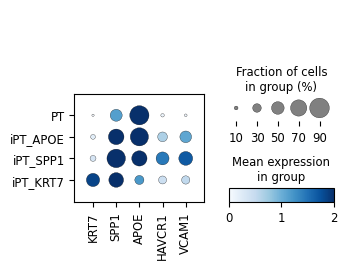

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


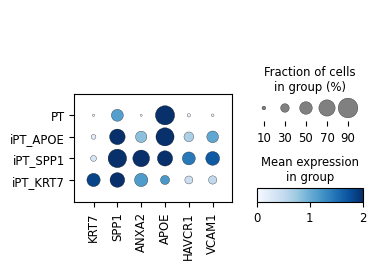

In [22]:
adata_PT = adata[adata.obs["cellType_CosMx_2"].isin(["iPT_SPP1","iPT_KRT7","iPT_APOE","PT"])]

Markers = ['KRT7',"SPP1",'APOE',"HAVCR1", "VCAM1"]
Markers2 = ['KRT7',"SPP1","ANXA2",'APOE',"HAVCR1", "VCAM1"]

sc.pl.dotplot(adata_PT, Markers, groupby='cellType_CosMx_2', dendrogram=False, cmap='Blues', layer = "counts", vmax = 2, vmin = 0)
sc.pl.dotplot(adata_PT, Markers2, groupby='cellType_CosMx_2', dendrogram=False, cmap='Blues', layer = "counts", vmax = 2, vmin = 0)


(array([   31.,    46.,    48.,    79.,   112.,   191.,   240.,   388.,
          557.,   808.,  1032.,  1320.,  1760.,  2306.,  2880.,  3617.,
         4344.,  5204.,  6038.,  6958.,  7650.,  8569.,  9545., 10227.,
        10609., 11146., 11650., 12202., 12700., 12793., 13065., 13054.,
        13217., 13473., 13530., 13537., 13815., 13693., 13432., 13385.,
        13250., 13167., 13250., 13191., 12778., 12534., 12209., 12080.,
        23028.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 49 artists>)

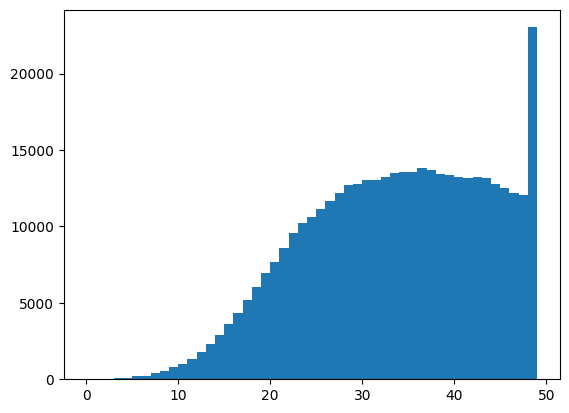

In [23]:
sq.gr.spatial_neighbors(
    adata,
    radius=0.05,
    coord_type="generic",
)

neighbor_check = []
for i in range(adata.obsp["spatial_connectivities"].shape[0]):
  neighbor_check.append(np.sum(adata.obsp["spatial_connectivities"][i]))

# total number of neighbors
plt.hist(neighbor_check, bins = np.arange(0, 50, 1))



  0%|          | 0/1000 [00:00<?, ?/s]

/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/tmp/ipykernel_47013/98014420.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["fibro_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, fibroCells])
/tmp/ipykernel_47013/98014420.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs["immune_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, immuneCells])


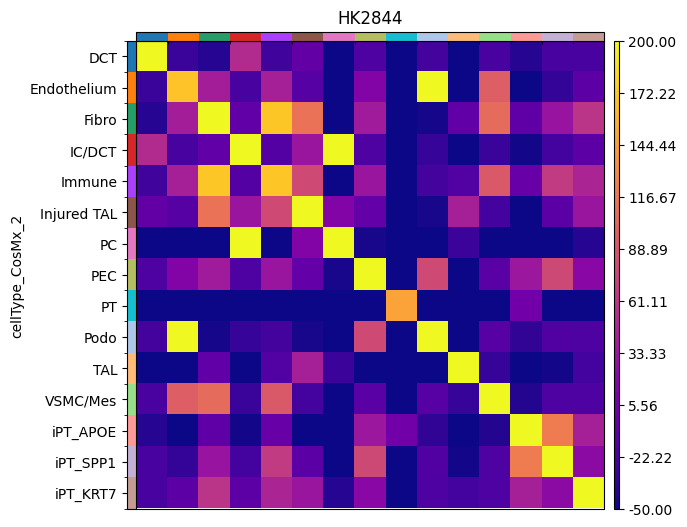

In [24]:
adata_1 = adata[adata.obs["sample"] == "HK2844"]

sq.gr.nhood_enrichment(adata_1, cluster_key="cellType_CosMx_2")
sq.pl.nhood_enrichment(
    adata_1,
    cluster_key="cellType_CosMx_2",
    figsize=(5, 5),
    title="HK2844",
    vmax = 200,
    vmin = -50,
    cmap = "plasma"
)

fibroCells = (np.where(adata.obs['cellType_CosMx_1']=="Fibro")[0])
neighbors_fibro = np.where(adata.obsp["spatial_connectivities"][:, fibroCells].sum(axis=1) > 0)[0]
adata.obs["fibro_neighbors"] = 0

for i in neighbors_fibro:
    adata.obs["fibro_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, fibroCells])

immuneCells = (np.where(adata.obs['cellType_CosMx_1']=="Immune")[0])
neighbors_immune = np.where(adata.obsp["spatial_connectivities"][:, immuneCells].sum(axis=1) > 0)[0]
adata.obs["immune_neighbors"] = 0

for i in neighbors_immune:
    adata.obs["immune_neighbors"].iloc[i] = np.sum(adata.obsp["spatial_connectivities"][i, immuneCells])
    

### HK3039

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


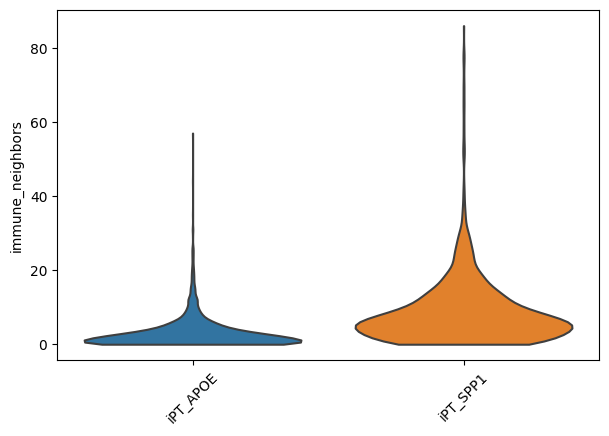

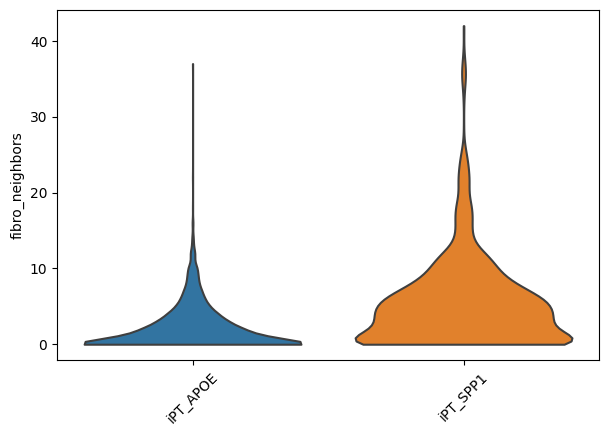

RanksumsResult(statistic=-15.177697425608867, pvalue=4.969215511752021e-52)

In [25]:
adata_iPT = adata[adata.obs["cellType_CosMx_1"] == "iPT"]
adata_2 = adata_iPT[adata_iPT.obs["sample"] == "HK3039"]

sc.pl.violin(adata_2, ['immune_neighbors'], size = 0, groupby = 'cellType_CosMx_2', rotation= 45, title = "Immune Neighbors, 20 microns, HK3039")
sc.pl.violin(adata_2, ['fibro_neighbors'], size = 0, groupby = 'cellType_CosMx_2', rotation= 45, title = "Fibro Neighbors, 20 microns, HK3039")

ranksums(adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_APOE"].obs["fibro_neighbors"], adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_SPP1"].obs["fibro_neighbors"])

In [26]:
ranksums(adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_APOE"].obs["immune_neighbors"], adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_SPP1"].obs["immune_neighbors"])

RanksumsResult(statistic=-43.541555447231275, pvalue=0.0)

### HK2844

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


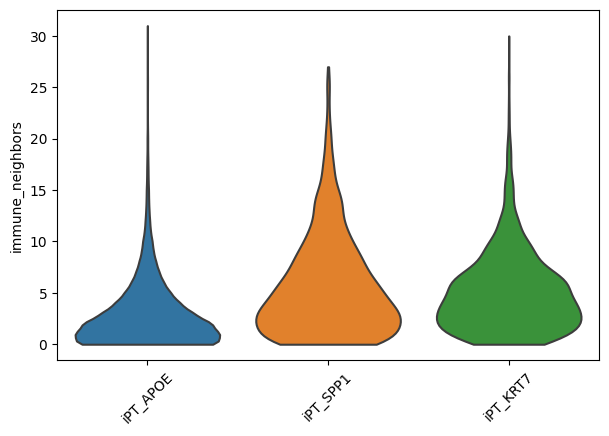

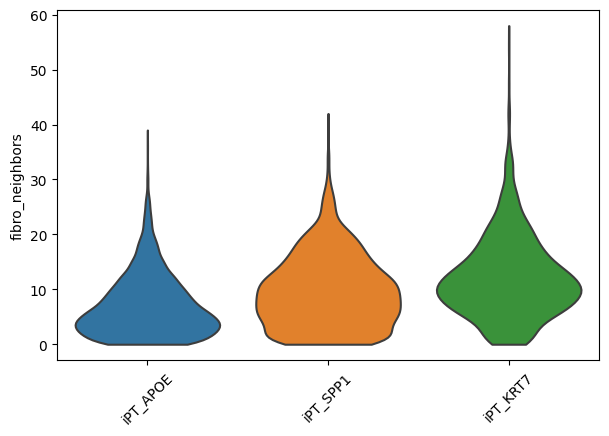

RanksumsResult(statistic=-15.177697425608867, pvalue=4.969215511752021e-52)

In [27]:
adata_iPT = adata[adata.obs["cellType_CosMx_1"] == "iPT"]
adata_2 = adata_iPT[adata_iPT.obs["sample"] == "HK2844"]

sc.pl.violin(adata_2, ['immune_neighbors'], size = 0, groupby = 'cellType_CosMx_2', rotation= 45, title = "Immune Neighbors, 20 microns, HK2844")
sc.pl.violin(adata_2, ['fibro_neighbors'], size = 0, groupby = 'cellType_CosMx_2', rotation= 45, title = "Fibro Neighbors, 20 microns, HK2844")

ranksums(adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_APOE"].obs["fibro_neighbors"], adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_SPP1"].obs["fibro_neighbors"])

In [28]:
ranksums(adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_APOE"].obs["fibro_neighbors"], adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_KRT7"].obs["fibro_neighbors"])

RanksumsResult(statistic=-37.80499885204505, pvalue=0.0)

In [29]:
ranksums(adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_SPP1"].obs["fibro_neighbors"], adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_KRT7"].obs["fibro_neighbors"])

RanksumsResult(statistic=-24.580683376718863, pvalue=2.0328102909095428e-133)

In [30]:
ranksums(adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_APOE"].obs["immune_neighbors"], adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_KRT7"].obs["immune_neighbors"])

RanksumsResult(statistic=-26.31320355354135, pvalue=1.3543101390578197e-152)

In [31]:
ranksums(adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_APOE"].obs["immune_neighbors"], adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_SPP1"].obs["immune_neighbors"])

RanksumsResult(statistic=-43.541555447231275, pvalue=0.0)

In [32]:
ranksums(adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_SPP1"].obs["immune_neighbors"], adata_iPT[adata_iPT.obs["cellType_CosMx_2"] == "iPT_KRT7"].obs["immune_neighbors"])

RanksumsResult(statistic=8.555692447419009, pvalue=1.1716328736792751e-17)

### Neighborhoods

  0%|          | 0/1000 [00:00<?, ?/s]

/usr/local/lib/python3.8/dist-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


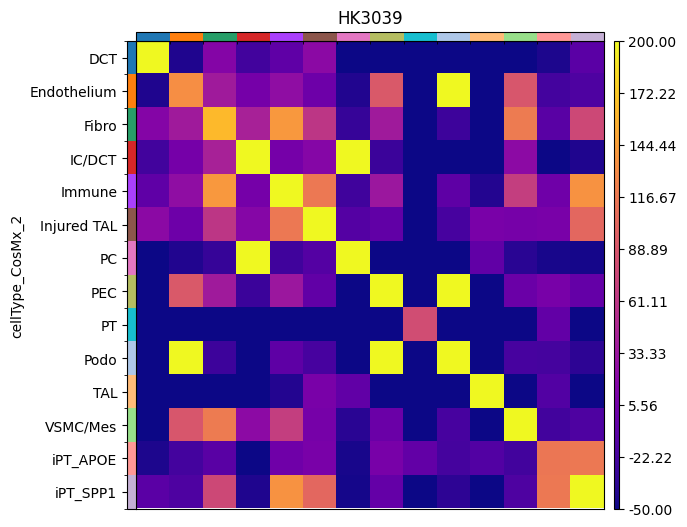

In [33]:
adata_2 = adata[adata.obs["sample"] == "HK3039"]

sq.gr.nhood_enrichment(adata_2, cluster_key="cellType_CosMx_2")
sq.pl.nhood_enrichment(
    adata_2,
    cluster_key="cellType_CosMx_2",
    figsize=(5, 5),
    title="HK3039",
    vmax = 200,
    vmin = -50,
    cmap = "plasma"
)


In [34]:
adata.write_h5ad(filename = "/home/levinsj/spatial/adata/1_29_24_slide0_annotated_iPTsubclusters.h5ad")